In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading the dataset 
lead = pd.read_csv('Downloads/Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
pd.set_option('display.max_columns',500)

In [5]:
lead.shape

(9240, 37)

# Data Preparation

In [6]:
# Checking missing values 
null = pd.DataFrame(round((lead.isnull().sum()/lead.shape[0]) * 100 ,2),columns = ['Null Percentage']).reset_index()
null

,index,Null Percentage
0,Prospect ID,0.00
1,Lead Number,0.00
2,Lead Origin,0.00
3,Lead Source,0.39
4,Do Not Email,0.00
5,Do Not Call,0.00
6,Converted,0.00
7,TotalVisits,1.48
8,Total Time Spent on Website,0.00
9,Page Views Per Visit,1.48


In [7]:
# Creating list of columns to drop 
null_30 = null[null['Null Percentage']>=30]
null_drop = null_30['index'].tolist()

In [8]:
lead = lead.drop(null_drop,axis = 1)

In [9]:
# dropping rows which have less than 5% OF NULL VALUES
lead = lead.dropna(subset = ['Lead Source','TotalVisits','Page Views Per Visit','Last Activity'],axis = 0)

In [10]:
value = ['Country','Specialization','How did you hear about X Education','What is your current occupation',
         'What matters most to you in choosing a course','Lead Profile','City']
for col in value:
    print(f'Value counts for {col}')
    print(lead[col].value_counts(normalize = True))
    print()

Value counts for Country
India                   0.957657
United States           0.010180
United Arab Emirates    0.007819
Singapore               0.003541
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland       

- AS I can see for columns value_counts are mostly select which means the person has not given information -
- Also for city , country data is from India -
- And occupation is also unemployed -
- SO I would use them to fill the null values for these columns -

In [11]:
for col in lead[value]:
    lead[col].fillna(lead[col].mode()[0],inplace = True)

In [12]:
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.378554,3.456028,482.887481,2.370151
std,23348.029512,0.485053,4.858802,545.256560,2.160871
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596406.000000,0.000000,1.000000,11.000000,1.000000
50%,615278.500000,0.000000,3.000000,246.000000,2.000000
75%,637176.500000,1.000000,5.000000,922.750000,3.200000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


In [13]:
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Select,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Select,Mumbai,No,No,Modified


In [14]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [15]:
# Creating map function
def binary(x):
    return x.map({'Yes':1,'No':0})

In [16]:
# applying binary to categorical varibales 
change = ['Do Not Email','Do Not Call','Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
          'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content',
          'Get updates on DM Content']
lead[change] = lead[change].apply(binary)

In [17]:
# Dropping uneccesary variables for analysis 
lead = lead.drop(['Prospect ID','Country','City','I agree to pay the amount through cheque','A free copy of Mastering The Interview',
                 'Last Notable Activity','Last Activity'], axis = 1)

- Some variables are mostly describing after the lead is converted which is not required for the model

In [18]:
lead.shape

(9074, 24)

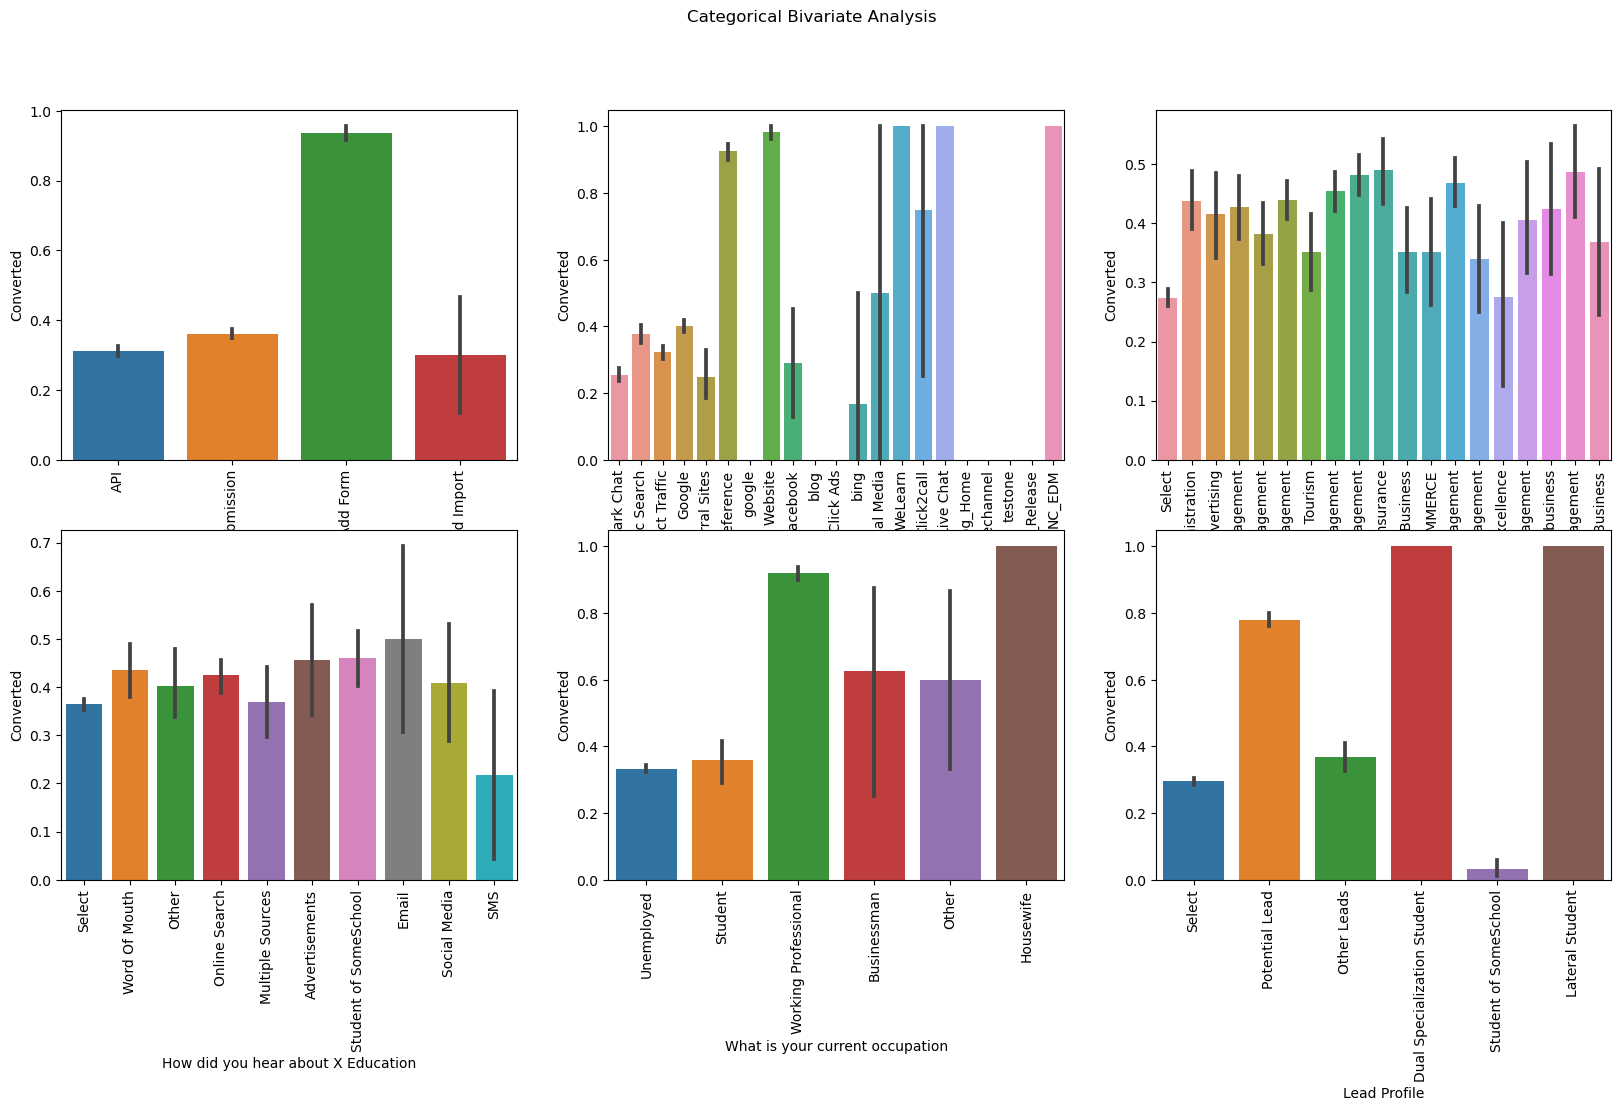

In [19]:
category = ['Lead Origin','Lead Source','Specialization','How did you hear about X Education','What is your current occupation',
           'Lead Profile']
plt.figure(figsize = [20,10])
for index,col in enumerate(category):
    plt.subplot(2,3,index+1)
    sns.barplot(x = lead[col],y = lead['Converted'])
    plt.xlabel(col)
    plt.xticks(rotation = 90)
    plt.suptitle('Categorical Bivariate Analysis',size = 12)
plt.show()

# Feature Engineering

In [20]:
lead.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile
0,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Select
1,660728,API,Organic Search,0,0,0,5.0,674,2.5,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Select
2,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Potential Lead
3,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Select
4,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,0,0,Select


In [21]:
# Creating dummy variables for categorical columns 

origin = pd.get_dummies(lead['Lead Origin'],drop_first = True)
lead   = pd.concat([lead,origin],1)

source = pd.get_dummies(lead['Lead Source'],drop_first = True)
lead   = pd.concat([lead,source],1)

special = pd.get_dummies(lead['Specialization'],prefix = 'specialization')
special = special.drop('specialization_Select',1)
lead    = pd.concat([lead,special],1)

education = pd.get_dummies(lead['How did you hear about X Education'],prefix = 'X_Eductaion')
education = education.drop('X_Eductaion_Select',1)
lead    = pd.concat([lead,education],1)

occupation = pd.get_dummies(lead['What is your current occupation'],prefix = 'Occupation')
occupation = occupation.drop('Occupation_Other',1)
lead       = pd.concat([lead,occupation],1)

course  = pd.get_dummies(lead['What matters most to you in choosing a course'],prefix = 'Course')
course  = course.drop(['Course_Other'],1)
lead    = pd.concat([lead,course],1)

profile = pd.get_dummies(lead['Lead Profile'],prefix = 'Lead')
profile = profile.drop(['Lead_Select'],1)
lead    = pd.concat([lead,profile],1)

In [22]:
lead = lead.drop(['Lead Origin','Lead Source','Specialization','Lead Source','How did you hear about X Education','What is your current occupation',
          'What matters most to you in choosing a course','Lead Profile'],axis = 1)

In [23]:
lead.head()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Landing Page Submission,Lead Add Form,Lead Import,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel and Tourism,X_Eductaion_Advertisements,X_Eductaion_Email,X_Eductaion_Multiple Sources,X_Eductaion_Online Search,X_Eductaion_Other,X_Eductaion_SMS,X_Eductaion_Social Media,X_Eductaion_Student of SomeSchool,X_Eductaion_Word Of Mouth,Occupation_Businessman,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Course_Better Career Prospects,Course_Flexibility & Convenience,Lead_Dual Specialization Student,Lead_Lateral Student,Lead_Other Leads,Lead_Potential Lead,Lead_Student of SomeSchool
0,660737,0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1,660728,0,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
2,660727,0,0,1,2.0,1532,2.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
3,660719,0,0,0,1.0,305,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
4,660681,0,0,1,2.0,1428,1.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [24]:
lead.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,Landing Page Submission,Lead Add Form,Lead Import,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel and Tourism,X_Eductaion_Advertisements,X_Eductaion_Email,X_Eductaion_Multiple Sources,X_Eductaion_Online Search,X_Eductaion_Other,X_Eductaion_SMS,X_Eductaion_Social Media,X_Eductaion_Student of SomeSchool,X_Eductaion_Word Of Mouth,Occupation_Businessman,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Course_Better Career Prospects,Course_Flexibility & Convenience,Lead_Dual Specialization Student,Lead_Lateral Student,Lead_Other Leads,Lead_Potential Lead,Lead_Student of SomeSchool
count,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.0,9074.0,9074.0,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000,9074.000000
mean,617032.619352,0.078907,0.000220,0.378554,3.456028,482.887481,2.370151,0.001543,0.0,0.000220,0.000110,0.000110,0.000441,0.000771,0.0,0.0,0.0,0.538351,0.064029,0.003306,0.280251,0.003416,0.316068,0.000220,0.000110,0.193189,0.127177,0.000110,0.000220,0.048821,0.013776,0.000220,0.000110,0.014216,0.000661,0.000110,0.000551,0.000110,0.000110,0.000110,0.036919,0.043972,0.006282,0.012233,0.105687,0.017192,0.012233,0.092242,0.040335,0.019396,0.090699,0.022261,0.054992,0.011020,0.008045,0.004408,0.038131,0.022261,0.007714,0.002865,0.016751,0.089046,0.020498,0.002535,0.007274,0.034164,0.038241,0.000882,0.000992,0.022702,0.899162,0.074609,0.999780,0.000110,0.002204,0.002314,0.053119,0.171259,0.026449
std,23348.029512,0.269608,0.014845,0.485053,4.858802,545.256560,2.160871,0.039251,0.0,0.014845,0.010498,0.010498,0.020992,0.027766,0.0,0.0,0.0,0.498554,0.244818,0.057407,0.449147,0.058353,0.464965,0.014845,0.010498,0.394822,0.333189,0.010498,0.014845,0.215505,0.116565,0.014845,0.010498,0.118389,0.025707,0.010498,0.023469,0.010498,0.010498,0.010498,0.188573,0.205044,0.079012,0.109929,0.307453,0.129993,0.109929,0.289383,0.196755,0.137920,0.287196,0.147541,0.227978,0.104404,0.089337,0.066251,0.191523,0.147541,0.087497,0.053455,0.128345,0.284825,0.141705,0.050285,0.084979,0.181659,0.191788,0.

- As I can see that columns like Magazine , Receive More Updates About Our Courses,Update me on Supply Chain Content,
 Get updates on DM Content they don't have information so it is better to drop them .

In [25]:
lead = lead.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content'
            ], axis = 1)

In [26]:
lead.corr()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Landing Page Submission,Lead Add Form,Lead Import,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel and Tourism,X_Eductaion_Advertisements,X_Eductaion_Email,X_Eductaion_Multiple Sources,X_Eductaion_Online Search,X_Eductaion_Other,X_Eductaion_SMS,X_Eductaion_Social Media,X_Eductaion_Student of SomeSchool,X_Eductaion_Word Of Mouth,Occupation_Businessman,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Course_Better Career Prospects,Course_Flexibility & Convenience,Lead_Dual Specialization Student,Lead_Lateral Student,Lead_Other Leads,Lead_Potential Lead,Lead_Student of SomeSchool
Lead Number,1.000000,-0.098898,0.012150,0.022830,0.022094,0.018360,0.058703,-0.012663,-0.012338,-0.003121,0.004721,-0.017779,-0.005659,-0.069574,0.024933,0.075668,-0.141412,0.072834,0.139387,0.012375,-0.015324,-0.067170,-0.018105,0.014796,-0.015756,0.022965,0.172330,-0.000505,0.011788,0.003712,0.013372,0.015044,0.032351,-0.003354,0.006778,0.003903,0.004017,-0.007216,0.003865,-0.000609,-0.010054,-0.006697,0.003409,-0.010292,-0.030597,-0.008871,0.000648,-0.015664,-0.010344,-0.010858,0.025490,-0.021197,-0.018067,-0.003818,-0.005895,0.020402,0.038968,0.042491,0.039081,0.015642,0.023826,0.011878,0.034076,0.004829,-0.013876,-0.033655,0.031781,-0.014346,0.009906,-0.000438,0.010201,0.031983,-0.026012,-0.077261,-0.089465
Do Not Email,-0.098898,1.000000,-0.004346,-0.140786,0.035715,-0.046192,0.036403,-0.011505,-0.004346,-0.003073,-0.003073,-0.006147,-0.008132,0.099661,-0.031468,-0.016857,0.112262,-0.017137,-0.071484,-0.004346,-0.003073,-0.051070,0.035510,-0.003073,0.050729,-0.035958,-0.010042,-0.004346,-0.003073,0.002835,-0.007529,-0.003073,0.010547,-0.003073,-0.003073,0.035869,-0.020451,0.005017,0.012947,0.030648,-0.004882,0.011606,0.012054,-0.018428,0.070893,0.003297,-0.025537,0.000169,-0.013224,0.023922,0.028553,0.054570,0.003625,0.061126,0.002226,-0.015690,-0.025462,-0.042709,-0.022146,0.001505,-0.001000,-0.023542,-0.022127,-0.008694,-0.009222,0.007534,0.039641,-0.047325,0.004346,-0.003073,-0.005039,-0.005590,-0.000060,-0.067948,0.053655
Do Not Call,0.012150,-0.004346,1.000000,0.019024,0.003190,0.007029,-0.005979,-0.000584,-0.000220,-0.000156,-0.000156,-0.000312,-0.000413,-0.016034,0.026442,-0.000855,-0.009265,-0.000869,0.005874,-0.000220,-0.000156,-0.007266,-0.005668,-0.000156,-0.000220,0.031087,-0.001755,-0.000220,-0.000156,-0.001783,-0.000382,-0.000156,-0.000349,-0.000156,-0.000156,-0.000156,-0.002907,-0.003184,-0.001181,-0.001652,-0.005104,0.055149,-0.001652,-0.004733,-0.003044,-0.002088,0.021162,-0.002240,-0.003582,-0.001567,-0.001337,-0.000988,-0.002956,-0.002240,-0.001309,-0.000796,0.055909,-0.004642,-0.002148,-0.000748,-0.001271,-0.002792,-0.002961,-0.000441,-0.000468,-0.002263,0.004972,-0.004216,0.000220,-0.000156,-0.000698,-0.000715,-0.003517,0.012956,-0.002447
Converted,0.022830,-0.140786,0.019024,1.000000,0.032855,0.359261,0.000260,-0.001735,0.003718,-0.008194,-0.008194,-0.005566,0.019233,-0.0

In [27]:
# Conversion Rate 
(lead['Converted'].sum()/lead.Converted.shape[0])* 100

37.85541106458012

# Creating Model

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [29]:
X = lead.drop(['Lead Number','Converted'],axis = 1)
y = lead.pop('Converted')

In [30]:
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size = 0.7 ,random_state = 42)

In [31]:
# Scaling the train data set
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Landing Page Submission,Lead Add Form,Lead Import,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel and Tourism,X_Eductaion_Advertisements,X_Eductaion_Email,X_Eductaion_Multiple Sources,X_Eductaion_Online Search,X_Eductaion_Other,X_Eductaion_SMS,X_Eductaion_Social Media,X_Eductaion_Student of SomeSchool,X_Eductaion_Word Of Mouth,Occupation_Businessman,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Course_Better Career Prospects,Course_Flexibility & Convenience,Lead_Dual Specialization Student,Lead_Lateral Student,Lead_Other Leads,Lead_Potential Lead,Lead_Student of SomeSchool
1943,0,0,-0.304688,1.704380,-0.169010,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
456,0,0,-0.304688,-0.789845,-0.169010,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
6547,0,0,0.326520,-0.176811,1.206110,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
8836,0,0,0.116117,2.117949,0.747736,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
6529,0,0,0.326520,0.315446,1.206110,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5850,0,0,-0.304688,-0.830104,-0.169010,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
5301,0,0,-0.094285,-0.747756,-0.398196,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
5501,0,0,-0.515091,-0.597700,-0.627383,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
897,0,0,0.326520,-0.286608,-0.320273,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [32]:
# Creating first model
lgm_1 = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial()).fit()
lgm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6279
Model Family:                Binomial   Df Model:                           71
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 18 Mar 2024   Deviance:                   1.3668e+05
Time:                        14:51:22   Pearson chi2:                 6.68e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                            -5.664e+15   9.69e+07  -5.84e+07      0.000   -5.66e+15   -5.66e+15
Do Not Email                                     -6.162e+14   3.18e+06  -1.94e+08      0.000   -6.16e+14   -6.16e+14
Do Not Call                                       4.224e+15   6.76e+07   6.25e+07      0.000    4.22e+15    4.22e+15
TotalVisits                                       1.096e+14   9.92e+05   1.11e+08      0.000     1.1e+14     1.1e+14
Total Time Spent on Website                       7.168e+13   9.75e+05   7.35e+07      0.000    7.17e+13    7.17e+13
Page Views Per Visit                              2.286e+13   1.19e+06   1.93e+07      0.000    2.29e+13    2.29e+13
Search                                           -4.815e+14   2.13e+07  -2.26e+07      0.000   -4.82e+14   -4.82e+14
Newspaper Article                                 5.277e+15   6.73e+07   7.84e+07      0.000    5.28e+15    5.28e+15
X Education Forums                               -1.078e+16   1.09e+08  -9.88e+07      0.000   -1.08e+16   -1.08e+16
Newspaper                                        -4.423e+15   6.72e+07  -6.58e+07      0.000   -4.42e+15   -4.42e+15
Digital Advertisement                             2.619e+14   3.89e+07   6.74e+06      0.000    2.62e+14    2.62e+14
Through Recommendations                           1.264e+15   3.53e+07   3.58e+07      0.000    1.26e+15    1.26e+15
Landing Page Submission                          -3.623e+14   3.64e+06  -9.95e+07      0.000   -3.62e+14   -3.62e+14
Lead Add Form                                     1.332e+15   4.75e+07    2.8e+07      0.000    1.33e+15    1.33e+15
Lead Import                                       6.557e+14   3.43e+07   1.91e+07      0.000    6.56e+14    6.56e+14
Direct Traffic                                     2.09e+15   6.74e+07    3.1e+07      0.000    2.09e+15    2.09e+15
Facebook                                          6.557e+14   3.43e+07   1.91e+07      0.000    6.56e+14    6.56e+14
Google                                            2.207e+15   6.73e+07   3.28e+07      0.000    2.21e+15    2.21e+15
Live Chat                                          6.19e+15   8.23e+07   7.52e+07      0.000    6.19e+15    6.19e+15
NC_EDM                                            7.009e+15   9.56e+07   7.33e+07      0.000    7.01e+15    7.01e+15
Olark Chat                                        1.182e+15   6.72e+07   1.76e+07      0.000    1.18e+15    1.18e+15
Organic Search                                    2.172e+15   6.74e+07   3.22e+07      0.000    2.17e+15    2.17e+15
Pay per Click Ads                                 -1.98e+15   9.52e+07  -2.08e+07      0.000   -1.98e+15   -1.98e+15
Press_Release                            

# Using Rfe to eliminate features

In [33]:
from sklearn.model_selection import cross_val_score
logistic = LogisticRegression()
rfe = RFE(logistic,n_features_to_select = 15)

rfe = rfe.fit(X_train ,y_train)

rfe.ranking_

array([ 1, 45, 43,  1, 56, 39, 33, 41,  7, 35, 53, 19,  1, 32,  1, 42,  1,
       34, 28, 26,  1, 47, 59,  6,  1, 58, 51,  1,  5, 31,  2, 44, 40, 50,
       11, 13, 55, 21, 17, 22, 48, 15, 14, 20, 12, 24, 16, 49,  8, 23, 18,
       27, 46,  3,  9, 52, 36,  4, 29, 30, 37, 10,  1, 25,  1,  1, 54, 38,
        1,  1, 57,  1,  1])

In [34]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 45),
 ('TotalVisits', False, 43),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 56),
 ('Search', False, 39),
 ('Newspaper Article', False, 33),
 ('X Education Forums', False, 41),
 ('Newspaper', False, 7),
 ('Digital Advertisement', False, 35),
 ('Through Recommendations', False, 53),
 ('Landing Page Submission', False, 19),
 ('Lead Add Form', True, 1),
 ('Lead Import', False, 32),
 ('Direct Traffic', True, 1),
 ('Facebook', False, 42),
 ('Google', True, 1),
 ('Live Chat', False, 34),
 ('NC_EDM', False, 28),
 ('Olark Chat', False, 26),
 ('Organic Search', True, 1),
 ('Pay per Click Ads', False, 47),
 ('Press_Release', False, 59),
 ('Reference', False, 6),
 ('Referral Sites', True, 1),
 ('Social Media', False, 58),
 ('WeLearn', False, 51),
 ('Welingak Website', True, 1),
 ('bing', False, 5),
 ('blog', False, 31),
 ('google', False, 2),
 ('testone', False, 44),
 ('welearnblog_Home', False, 40),
 ('youtubech

In [35]:
precision_scores = cross_val_score(logistic,X_train,y_train,cv = 5 , scoring = 'precision')

In [36]:
col = X_train.columns[rfe.support_]

In [37]:
# Importing VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [38]:
def vif(data):
    vif = pd.DataFrame()
    vif['features'] = data.columns
    vif['VIF Score'] = [variance_inflation_factor(data,i) for i in range(data.shape[1])]
    vif = vif.sort_values(by = 'VIF Score',ascending = False)
    
    return vif

In [39]:
X_train_sm = X_train[col]

In [40]:
# Creating second model 
logm_2 = sm.GLM(y_train ,sm.add_constant(X_train_sm),family = sm.families.Binomial()).fit()
logm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2736.6
Date:                Mon, 18 Mar 2024   Deviance:                       5473.1
Time:                        14:51:26   Pearson chi2:                 6.82e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3688
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2744      0.234      1.175      0.240      -0.183       0.732
Do Not Email                        -1.3385      0.168     -7.949      0.000      -1.668      -1.008
Total Time Spent on Website          1.1141      0.039     28.308      0.000       1.037       1.191
Lead Add Form                        2.5404      0.222     11.453      0.000       2.106       2.975
Direct Traffic                      -1.0980      0.110     -9.980      0.000      -1.314      -0.882
Google                              -0.7926      0.105     -7.560      0.000      -0.998      -0.587
Organic Search                      -0.8681      0.127     -6.825      0.000      -1.117      -0.619
Referral Sites                      -1.3662      0.321     -4.256      0.000      -1.995      -0.737
Welingak Website                     3.4229      1.030      3.323      0.001       1.404       5.442
Occupation_Housewife                23.2476   2.51e+04      0.001      0.999   -4.91e+04    4.91e+04
Occupation_Unemployed               -0.7103      0.223     -3.179      0.001      -1.148      -0.272
Occupation_Working Professional      1.9930      0.294      6.790      0.000       1.418       2.568
Lead_Dual Specialization Student    22.9253   2.03e+04      0.001      0.999   -3.98e+04    3.98e+04
Lead_Lateral Student                23.5391   1.81e+04      0.001      0.999   -3.54e+04    3.54e+04
Lead_Potential Lead                  1.7187      0.094     18.193      0.000       1.534       1.904
Lead_Student of SomeSchool          -2.9467      0.533     -5.528      0.000      -3.991      -1.902
====================================================================================================
"""

In [41]:
# Creating third model 
logm_3 = sm.GLM(y_train ,sm.add_constant(X_train_sm.drop('Lead_Lateral Student',axis = 1)),family = sm.families.Binomial()).fit()
logm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2745.3
Date:                Mon, 18 Mar 2024   Deviance:                       5490.7
Time:                        14:51:26   Pearson chi2:                 6.84e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3670
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                                0.2698      0.234      1.155      0.248      -0.188       0.728
Do Not Email                        -1.3232      0.167     -7.917      0.000      -1.651      -0.996
Total Time Spent on Website          1.1147      0.039     28.358      0.000       1.038       1.192
Lead Add Form                        2.5512      0.221     11.519      0.000       2.117       2.985
Direct Traffic                      -1.0918      0.110     -9.938      0.000      -1.307      -0.876
Google                              -0.7831      0.105     -7.482      0.000      -0.988      -0.578
Organic Search                      -0.8689      0.127     -6.834      0.000      -1.118      -0.620
Referral Sites                      -1.3670      0.321     -4.259      0.000      -1.996      -0.738
Welingak Website                     3.4301      1.030      3.331      0.001       1.412       5.448
Occupation_Housewife                23.2499   2.51e+04      0.001      0.999   -4.91e+04    4.91e+04
Occupation_Unemployed               -0.7046      0.223     -3.155      0.002      -1.142      -0.267
Occupation_Working Professional      2.0027      0.293      6.830      0.000       1.428       2.577
Lead_Dual Specialization Student    22.9180   2.03e+04      0.001      0.999   -3.98e+04    3.98e+04
Lead_Potential Lead                  1.7115      0.094     18.122      0.000       1.526       1.897
Lead_Student of SomeSchool          -2.9515      0.533     -5.537      0.000      -3.996      -1.907
====================================================================================================
"""

In [42]:
vif(X_train_sm.drop(['Lead_Lateral Student','Lead_Dual Specialization Student'],axis = 1))

,features,VIF Score
9,Occupation_Unemployed,5.032139
4,Google,2.884070
3,Direct Traffic,2.606571
2,Lead Add Form,1.774706
5,Organic Search,1.766962
10,Occupation_Working Professional,1.499135
11,Lead_Potential Lead,1.401644
7,Welingak Website,1.341956
1,Total Time Spent on Website,1.295503
0,Do Not Email,1.120359


In [43]:
# Creating fourth model 
logm_4 = sm.GLM(y_train ,sm.add_constant(X_train_sm.drop(['Lead_Lateral Student','Lead_Dual Specialization Student'] ,axis = 1)),
                family = sm.families.Binomial()).fit()
logm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2750.7
Date:                Mon, 18 Mar 2024   Deviance:                       5501.3
Time:                        14:51:26   Pearson chi2:                 6.87e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3660
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.2709      0.234      1.160      0.246      -0.187       0.729
Do Not Email                       -1.3293      0.167     -7.948      0.000      -1.657      -1.001
Total Time Spent on Website         1.1175      0.039     28.425      0.000       1.040       1.195
Lead Add Form                       2.5512      0.221     11.518      0.000       2.117       2.985
Direct Traffic                     -1.0948      0.110     -9.967      0.000      -1.310      -0.880
Google                             -0.7833      0.105     -7.488      0.000      -0.988      -0.578
Organic Search                     -0.8566      0.127     -6.757      0.000      -1.105      -0.608
Referral Sites                     -1.3720      0.321     -4.271      0.000      -2.002      -0.742
Welingak Website                    3.4303      1.030      3.331      0.001       1.412       5.448
Occupation_Housewife               22.2444   1.52e+04      0.001      0.999   -2.98e+04    2.98e+04
Occupation_Unemployed              -0.7022      0.223     -3.143      0.002      -1.140      -0.264
Occupation_Working Professional     2.0304      0.293      6.933      0.000       1.456       2.604
Lead_Potential Lead                 1.7067      0.094     18.064      0.000       1.522       1.892
Lead_Student of SomeSchool         -2.9554      0.533     -5.543      0.000      -4.000      -1.910
===================================================================================================
"""

In [44]:
# Creating fifth model 
logm_5 = sm.GLM(y_train ,sm.add_constant(X_train_sm.drop(['Lead_Lateral Student','Lead_Dual Specialization Student','Occupation_Housewife'] ,axis = 1)),
                family = sm.families.Binomial()).fit()
logm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2754.2
Date:                Mon, 18 Mar 2024   Deviance:                       5508.4
Time:                        14:51:27   Pearson chi2:                 6.89e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3653
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                               0.3757      0.229      1.638      0.101      -0.074       0.825
Do Not Email                       -1.3336      0.167     -7.972      0.000      -1.661      -1.006
Total Time Spent on Website         1.1163      0.039     28.416      0.000       1.039       1.193
Lead Add Form                       2.5569      0.221     11.551      0.000       2.123       2.991
Direct Traffic                     -1.0929      0.110     -9.951      0.000      -1.308      -0.878
Google                             -0.7791      0.105     -7.452      0.000      -0.984      -0.574
Organic Search                     -0.8483      0.127     -6.700      0.000      -1.096      -0.600
Referral Sites                     -1.3688      0.321     -4.262      0.000      -1.998      -0.739
Welingak Website                    3.4262      1.030      3.327      0.001       1.408       5.444
Occupation_Unemployed              -0.8093      0.219     -3.698      0.000      -1.238      -0.380
Occupation_Working Professional     1.9234      0.289      6.646      0.000       1.356       2.491
Lead_Potential Lead                 1.7033      0.094     18.037      0.000       1.518       1.888
Lead_Student of SomeSchool         -3.0053      0.534     -5.629      0.000      -4.052      -1.959
===================================================================================================
"""

In [45]:
vif(X_train_sm.drop(['Lead_Lateral Student','Lead_Dual Specialization Student','Occupation_Housewife'] ,axis = 1))

,features,VIF Score
8,Occupation_Unemployed,5.005961
4,Google,2.868979
3,Direct Traffic,2.596664
2,Lead Add Form,1.767409
5,Organic Search,1.761207
9,Occupation_Working Professional,1.495474
10,Lead_Potential Lead,1.401453
7,Welingak Website,1.341450
1,Total Time Spent on Website,1.294978
0,Do Not Email,1.120341


In [46]:
col = col.drop(['Lead_Lateral Student','Lead_Dual Specialization Student','Occupation_Housewife'])
X_train_sm = sm.add_constant(X_train[col])

In [47]:
y_train_pred = logm_5.predict(X_train_sm)
y_train_pred

1943    0.592938
456     0.063921
6547    0.151377
8836    0.941897
6529    0.970867
          ...   
5850    0.079212
5301    0.114311
5501    0.100320
897     0.106950
7413    0.165982
Length: 6351, dtype: float64

# Creating dataframe with churn probabilities

In [48]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values,'Converted_prob':y_train_pred.values})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final

,Converted,Converted_prob,Lead Number
0,0,0.592938,1943
1,0,0.063921,456
2,0,0.151377,6547
3,0,0.941897,8836
4,1,0.970867,6529
...,...,...,...
6346,0,0.079212,5850
6347,0,0.114311,5301
6348,0,0.100320,5501
6349,0,0.106950,897


In [49]:
# Assigning a boundary for yes or no
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.apply(lambda x: 0 if x<0.5 else 1)

In [50]:
# Creating Confusion metrics
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final.predicted)

In [51]:
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted)

0.8034955125177138

In [52]:
metrics.recall_score(y_train_pred_final.Converted,y_train_pred_final.predicted)

0.6680707666385847

In [53]:
metrics.precision_score(y_train_pred_final.Converted,y_train_pred_final.predicted)

0.7751710654936461

# Metrics beyond accuracy

In [54]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [55]:
# Sensitivity
TP/float(TP+FN)

0.6680707666385847

In [56]:
# Specificity
TN/float(TN+FP)

0.884334925823485

In [57]:
# Calculate False positive rate
FP/float(FP+TN)

0.11566507417651496

In [58]:
# Calculate True positive rate
TP/float(TP+FP)

0.7751710654936461

In [59]:
# Calculate True Negative
TN/float(TN+FN)

0.8169570267131243

# Plotting ROC Curve

In [60]:
def roc_curve(actual,pred):
    fpr,tpr,threshold = metrics.roc_curve(actual,pred,drop_intermediate = True)
    auc_score = metrics.roc_auc_score(actual,pred)
    plt.figure(figsize = [5,5])
    plt.plot(fpr,tpr,label = 'Roc_score = (area = %0.2f)'%auc_score)
    plt.plot([0,1],[0,1], 'k--')
    plt.xlim(0.0,1.0)
    plt.ylim(0.0,1.05)
    plt.xlabel('False positive rate [1 -True Postive Rate]')
    plt.ylabel('True Postive Rate')
    plt.title('Reciever Operating Characteristics Example')
    plt.legend(loc = 'lower right')
    plt.show()
    return None

In [61]:
fpr , tpr ,threshold = metrics.roc_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_prob)

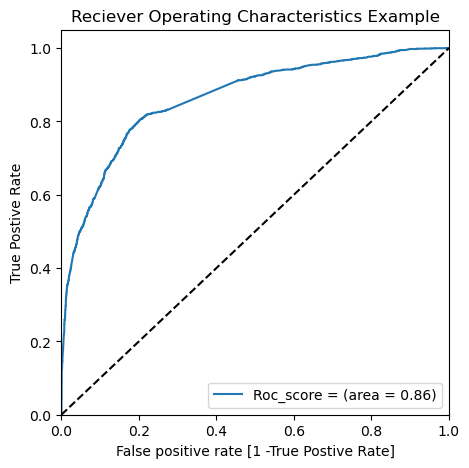

In [62]:
roc_curve(y_train_pred_final.Converted,y_train_pred_final.Converted_prob)

# Finding the Optimal Cuttoff point

In [63]:
# lets create columns with different cuttoff
number = [float(x)/10 for x in range(10)]
for i in number:
    y_train_pred_final[i] = y_train_pred_final.Converted_prob.apply(lambda x: 0 if x<i else 1)
y_train_pred_final.head()

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.592938,1943,1,1,1,1,1,1,1,0,0,0,0
1,0,0.063921,456,0,1,0,0,0,0,0,0,0,0,0
2,0,0.151377,6547,0,1,1,0,0,0,0,0,0,0,0
3,0,0.941897,8836,1,1,1,1,1,1,1,1,1,1,1
4,1,0.970867,6529,1,1,1,1,1,1,1,1,1,1,1


In [64]:
# Create cuttoff dataframe and finding the optimal point
cuttoff_df = pd.DataFrame(columns = ['prob','accuracy','sensitivity','specificity'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

for i in num:
    cm = metrics.confusion_matrix(y_train_pred_final.Converted,y_train_pred_final[i])
    total =sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    
    sensitivity = cm[1,1]/float(cm[1,0]+cm[1,1])
    specificity = cm[0,0]/float(cm[0,1]+cm[0,0])
    cuttoff_df.loc[i] = [i,accuracy,sensitivity,specificity]
cuttoff_df

,prob,accuracy,sensitivity,specificity
0.0,0.0,0.373799,1.000000,0.000000
0.1,0.1,0.491891,0.976411,0.202665
0.2,0.2,0.769485,0.828981,0.733970
0.3,0.3,0.800976,0.796967,0.803369
0.4,0.4,0.803496,0.736731,0.843349
0.5,0.5,0.803496,0.668071,0.884335
0.6,0.6,0.792001,0.565291,0.927332
0.7,0.7,0.780979,0.485678,0.957254
0.8,0.8,0.752480,0.369840,0.980890
0.9,0.9,0.724295,0.279275,0.989942


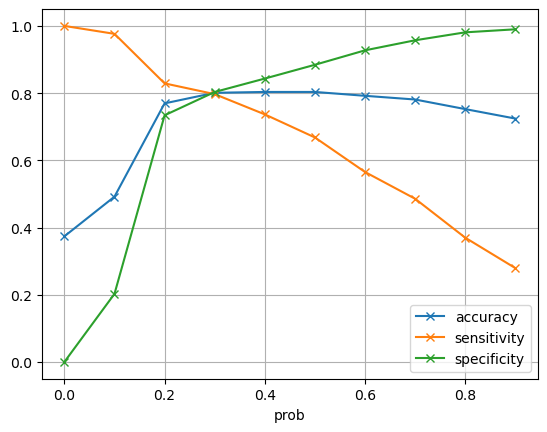

In [65]:
# Plotting the graph to see optimal cuttoff point 
plt.plot(cuttoff_df['prob'],cuttoff_df[['accuracy','sensitivity','specificity']],marker = 'x')
plt.xlabel('prob')
plt.legend(['accuracy','sensitivity','specificity'])
plt.grid(True)
plt.show()

- As from the graph it is clear that 0.3 is the optimal cutoff

In [66]:
# Taking 0.3 as optimal cutoff
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.apply(lambda x: 0 if x<0.3 else 1)
y_train_pred_final

,Converted,Converted_prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.592938,1943,1,1,1,1,1,1,1,0,0,0,0
1,0,0.063921,456,0,1,0,0,0,0,0,0,0,0,0
2,0,0.151377,6547,0,1,1,0,0,0,0,0,0,0,0
3,0,0.941897,8836,1,1,1,1,1,1,1,1,1,1,1
4,1,0.970867,6529,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6346,0,0.079212,5850,0,1,0,0,0,0,0,0,0,0,0
6347,0,0.114311,5301,0,1,1,0,0,0,0,0,0,0,0
6348,0,0.100320,5501,0,1,1,0,0,0,0,0,0,0,0
6349,0,0.106950,897,0,1,1,0,0,0,0,0,0,0,0


In [67]:
metrics.accuracy_score(y_train_pred_final.Converted,y_train_pred_final.predicted) * 100

80.09762242166587

In [68]:
# Precision score
metrics.precision_score(y_train_pred_final.Converted,y_train_pred_final.predicted) * 100

70.75542258788332

In [69]:
# Recall score 
metrics.recall_score(y_train_pred_final.Converted,y_train_pred_final.predicted) * 100

79.69671440606572

- Recall score is 80% which is desired so I can now proceed to test data

# Precision and Recall Tradeoff

In [70]:
from sklearn.metrics import precision_recall_curve

In [71]:
p,r,thresholds = metrics.precision_recall_curve(y_train_pred_final.Converted ,y_train_pred_final.Converted_prob)


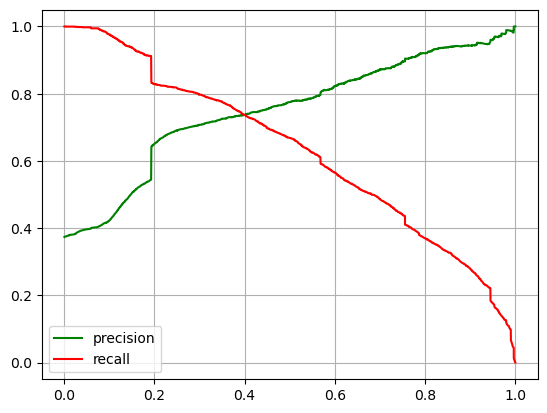

In [72]:
plt.plot(thresholds,p[:-1] ,'g-')
plt.plot(thresholds,r[:-1] ,'r')
plt.legend(['precision','recall'])
plt.grid(True)
plt.show()

# Making predictions on the test data

In [73]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_test

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Landing Page Submission,Lead Add Form,Lead Import,Direct Traffic,Facebook,Google,Live Chat,NC_EDM,Olark Chat,Organic Search,Pay per Click Ads,Press_Release,Reference,Referral Sites,Social Media,WeLearn,Welingak Website,bing,blog,google,testone,welearnblog_Home,youtubechannel,"specialization_Banking, Investment And Insurance",specialization_Business Administration,specialization_E-Business,specialization_E-COMMERCE,specialization_Finance Management,specialization_Healthcare Management,specialization_Hospitality Management,specialization_Human Resource Management,specialization_IT Projects Management,specialization_International Business,specialization_Marketing Management,specialization_Media and Advertising,specialization_Operations Management,specialization_Retail Management,specialization_Rural and Agribusiness,specialization_Services Excellence,specialization_Supply Chain Management,specialization_Travel and Tourism,X_Eductaion_Advertisements,X_Eductaion_Email,X_Eductaion_Multiple Sources,X_Eductaion_Online Search,X_Eductaion_Other,X_Eductaion_SMS,X_Eductaion_Social Media,X_Eductaion_Student of SomeSchool,X_Eductaion_Word Of Mouth,Occupation_Businessman,Occupation_Housewife,Occupation_Student,Occupation_Unemployed,Occupation_Working Professional,Course_Better Career Prospects,Course_Flexibility & Convenience,Lead_Dual Specialization Student,Lead_Lateral Student,Lead_Other Leads,Lead_Potential Lead,Lead_Student of SomeSchool
465,0,0,0.536923,-0.250009,1.664483,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
5424,0,0,0.116117,0.361195,0.747736,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
3503,0,0,-0.725494,-0.892323,-1.085756,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
4465,0,0,-0.725494,-0.892323,-1.085756,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
5394,0,0,0.116117,-0.592210,-0.476120,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3436,0,0,-0.304688,0.419753,-0.627383,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
1621,0,0,-0.725494,-0.892323,-1.085756,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
7665,0,0,-0.725494,-0.892323,-1.085756,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
7274,0,0,-0.725494,-0.892323,-1.085756,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0


In [74]:
# Adding constant
X_test_sm = sm.add_constant(X_test[col])

In [75]:
y_test_pred = logm_5.predict(X_test_sm)

In [76]:
# Creating DataFrame for test data 
y_test_pred_final = pd.DataFrame({'Converted':y_test.values,'Converted_prob':y_test_pred.values})
y_test_pred_final['Lead Number'] = y_test.index
y_test_pred_final.head()

,Converted,Converted_prob,Lead Number
0,0,0.183651,465
1,0,0.293452,5424
2,0,0.567982,3503
3,0,0.193148,4465
4,0,0.250739,5394


In [77]:
y_test_pred_final['Converted_pred'] = y_test_pred_final.Converted_prob.apply(lambda x: 0 if x<0.3 else 1)

In [78]:
# Accuracy Score
metrics.accuracy_score(y_test_pred_final.Converted,y_test_pred_final.Converted_pred) * 100

79.94858611825192

In [79]:
#Precision Score
metrics.precision_score(y_test_pred_final.Converted,y_test_pred_final.Converted_pred) * 100

72.52843394575677

In [80]:
#Recall score
metrics.recall_score(y_test_pred_final.Converted,y_test_pred_final.Converted_pred) * 100

78.13383600377003

In [81]:
confusion_2 = metrics.confusion_matrix(y_test_pred_final.Converted,y_test_pred_final.Converted_pred)
confusion_2

array([[1348,  314],
       [ 232,  829]], dtype=int64)